Dataset: https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
data = pd.read_csv('10 - Forest Fires in Brazil.csv', encoding= "iso-8859-1", parse_dates=['date'])

In [122]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

5. Check For Duplicate Data and Drop Them

In [123]:
data.duplicated().sum()

32

In [124]:
data = data.drop_duplicates()

In [125]:
data.shape

(6422, 5)

6. Check Null Values In The Dataset

In [126]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

8. Rename Month Names To English

In [127]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [128]:
month_mapping = {
    'Janeiro': 'Jan',
    'Fevereiro': 'Feb',
    'Março': 'Mar',
    'Abril': 'Apr',
    'Maio': 'May',
    'Junho': 'Jun',
    'Julho': 'Jul',
    'Agosto': 'Aug',
    'Setembro': 'Sep',
    'Outubro': 'Oct',
    'Novembro': 'Nov',
    'Dezembro': 'Dec'
}

In [129]:
data['month_eng'] = data['month'].map(month_mapping)

9. Total Number of Fires Registered

In [130]:
data.shape

(6422, 6)

10. In Which Month Maximum Number of Forest Fires Were Reported?

In [131]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_eng'], dtype='object')

In [132]:
data.groupby('month_eng')['number'].sum().sort_values(ascending=False)

month_eng
Jul    92319.113
Oct    88681.579
Aug    88050.435
Nov    85508.054
Sep    58578.305
Dec    57535.480
Jun    55997.675
Jan    47681.844
May    34725.363
Feb    30839.050
Mar    30709.405
Apr    28184.770
Name: number, dtype: float64

In [133]:
data.groupby('month_eng')['number'].sum().reset_index()

,month_eng,number
0,Apr,28184.770
1,Aug,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,Jul,92319.113
6,Jun,55997.675
7,Mar,30709.405
8,May,34725.363
9,Nov,85508.054


11. In Which Year Maximum Number of Forest Fires Was Reported?

In [134]:
data.groupby('year')['number'].sum().sort_values(ascending=False)

year
2003    42760.674
2016    42212.229
2015    41208.292
2012    40084.860
2014    39621.183
2009    39116.178
2004    38450.163
2002    37390.600
2010    37037.449
2017    36619.624
2013    35137.118
2005    35004.965
2011    34633.545
2006    33824.161
2007    33028.413
2008    29378.964
2001    29054.612
2000    27351.251
1999    26882.821
1998    20013.971
Name: number, dtype: float64

12. In Which State Maximum Number of Forest Fires Was Reported?

In [135]:
data.groupby('state')['number'].sum().sort_values(ascending=False)

state
Mato Grosso         96246.028
Paraiba             52426.918
Sao Paulo           51121.198
Rio                 45094.865
Bahia               44746.226
Piau                37803.747
Goias               37695.520
Minas Gerais        37475.258
Tocantins           33707.885
Amazonas            30650.129
Ceara               30428.063
Maranhao            25129.131
Pará                24512.144
Pernambuco          24498.000
Roraima             24385.074
Santa Catarina      24359.852
Amapa               21831.576
Rondonia            20285.429
Acre                18464.030
Espirito Santo       6546.000
Alagoas              4606.000
Distrito Federal     3561.000
Sergipe              3237.000
Name: number, dtype: float64

13. Find Total Number of Fires Were Reported In Amazonas

In [136]:
data[data['state']=="Amazonas"]['number'].sum()

30650.129

14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [137]:
data2 = data[data['state']=="Amazonas"]

In [138]:
data2.groupby('year')['number'].sum()

year
1998     946.000
1999    1061.000
2000     853.000
2001    1297.000
2002    2852.000
2003    1524.268
2004    2298.207
2005    1657.128
2006     997.640
2007     589.601
2008    2717.000
2009    1320.601
2010    2324.508
2011    1652.538
2012    1110.641
2013     905.217
2014    2385.909
2015    1189.994
2016    2060.972
2017     906.905
Name: number, dtype: float64

15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [139]:
data2 = data[data['state']=="Amazonas"]

In [140]:
day = data2.groupby(data2['date'].dt.dayofweek)['number'].sum()

import calendar

day.index = [calendar.day_name[x] for x in range (0,7)]
day

Monday       1886.601
Tuesday      6474.217
Wednesday    3910.177
Thursday     5754.802
Friday       5446.480
Saturday     4162.666
Sunday       3015.186
Name: number, dtype: float64

16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [141]:
monthly_fires_2015 = data[data['year']==2015].groupby('month_eng')['number'].sum().reset_index()

In [142]:
# Sort by months if necessary
monthly_fires_2015['month_eng'] = pd.Categorical(monthly_fires_2015['month_eng'],
                                                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                                                 ordered=True)
monthly_fires_2015 = monthly_fires_2015.sort_values('month_eng')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21392\2603057105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_eng', y='number', data=monthly_fires_2015, palette='viridis')


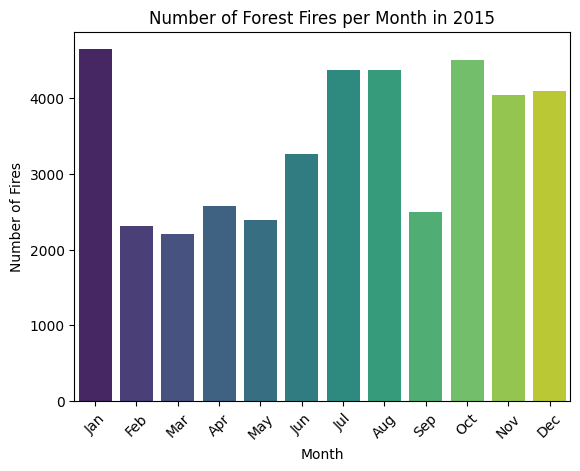

In [143]:
# Create a bar plot
sns.barplot(x='month_eng', y='number', data=monthly_fires_2015, palette='viridis')
# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.title('Number of Forest Fires per Month in 2015')
plt.xticks(rotation=45)
plt.show()

17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [144]:
data.groupby('state')['number'].mean().sort_values(ascending=False)

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64

18.  To Find The State Names Where Fires Were Reported In 'dec' Month


In [159]:
data[data['month_eng']=='Dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)